In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('generalized_review_tokens_11_tagged_v3.xlsx',index_col=0)
df['Corrected'] =0
df.head()

,review no,restaurant,sentence no,words,algo_tag,Corrected
0,0,1441 Pizzeria,0,I,O,0
1,0,1441 Pizzeria,0,visited,O,0
2,0,1441 Pizzeria,0,the,O,0
3,0,1441 Pizzeria,0,Fort,O,0
4,0,1441 Pizzeria,0,outlet,O,0


In [3]:
class sentenceGetter(object):
    def __init__(self,df):
        self.data = df
        agg_func = lambda s: [ (w,t) for w,t in zip(s["words"].tolist(),s["algo_tag"].tolist())]
        self.grouped = self.data.groupby(["review no","sentence no"]).apply(agg_func)
        self.sentences = [sentence for sentence in self.grouped]

In [4]:
getter = sentenceGetter(df)
sentences = getter.sentences # get word,entity pair

In [5]:
print(sentences[:2])

[[('I', 'O'), ('visited', 'O'), ('the', 'O'), ('Fort', 'O'), ('outlet', 'O'), ('and', 'O'), ('I', 'O'), ('wish', 'O'), ('to', 'O'), ('keep', 'O'), ('visitinggg', 'O'), ('..', 'O')], [('I', 'O'), ('happened', 'O'), ('to', 'O'), ('walk', 'O'), ('into', 'O'), ('the', 'O'), ('outlet', 'O'), ('on', 'O'), ('a', 'O'), ('Wednesday', 'O'), ('and', 'O'), ('guess', 'O'), ('what', 'O'), ('!', 'O')]]


In [6]:
reviews = [[str(pair[0]) for pair in sentence] for sentence in sentences]
tags =  [[str(pair[1]) for pair in sentence] for sentence in sentences]

In [7]:
import nltk
from nltk import word_tokenize
from nltk import pos_tag

In [8]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
pos_ =  [pos_tag(review) for review in reviews] 
pos = [[str(pair[1]) for pair in sentence] for sentence in pos_] # get pos

In [10]:
print(reviews[3])
print(tags[3])
print(pos[3])

['I', 'chose', 'the', 'make', 'your', 'own', 'pizza', 'with', 'unlimited', 'toppings', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'E', 'O', 'O', 'E', 'O']
['PRP', 'VBD', 'DT', 'VB', 'PRP$', 'JJ', 'NN', 'IN', 'JJ', 'NNS', '.']


In [12]:
entity_tags =[] # get pos+E 
for i,sequence in enumerate(tags):
    entity_tag =[]
    for j,tag in enumerate(sequence):
        if tag=='E':
            entity_tag.append(sequence[j])
        else:
            entity_tag.append(pos[i][j])
    entity_tags.append(entity_tag)

In [13]:
print(reviews[3])
print(entity_tags[3])

['I', 'chose', 'the', 'make', 'your', 'own', 'pizza', 'with', 'unlimited', 'toppings', '.']
['PRP', 'VBD', 'DT', 'VB', 'PRP$', 'JJ', 'E', 'IN', 'JJ', 'E', '.']


In [209]:
# sequences=[] # get word,entity_pos
# for sentence,tagseq in zip(reviews,entity_tags):
#     sequence =[]
#     for word,tag in zip(sentence,tagseq):
#         sequence.append((word,tag))
#     sequences.append(sequence)

In [210]:
ids=[]
e_tags = []
e_reviews =[]
for i,(rev,seq) in enumerate(zip(reviews,entity_tags)):
    if 'E' in seq:
        e_reviews.append(rev)
        e_tags.append(seq)
        ids.append(i)

##### Test

In [264]:
nva = "PHRASE:{(<JJ|JJR|JJS|NN|NNS|NNP|NNPS>?<E>+<CC>)?<JJ|JJR|JJS|NN|NNS|NNP|NNPS>?<E>+<VB|VBP|VBN|VBD><RB>?<JJ|JJR|JJS|NN|NNS|NNP|NNPS>+}"
an = "PHRASE:{<RB>?<JJ|JJR|JJS><E>+}"

In [265]:
from nltk import RegexpParser
parser = RegexpParser(grammar=nva)

In [266]:
test =[('The','DT'),('Burger','E'),('and','CC'),('Pizza','E'),('was','VB'),('very','RB'),('good','JJ')]
test

[('The', 'DT'),
 ('Burger', 'E'),
 ('and', 'CC'),
 ('Pizza', 'E'),
 ('was', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ')]

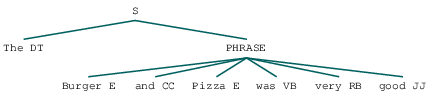

In [267]:
ress =parser.parse(test) ## Need ghostscript to draw tree
ress

In [268]:
print(ress)

(S The/DT (PHRASE Burger/E and/CC Pizza/E was/VB very/RB good/JJ))


#### Only E sents

In [269]:
print(len(reviews))
print(len(entity_tags))
print(len(e_reviews))
print(len(e_tags))

7172
7172
3618
3618


In [270]:
parser = RegexpParser(grammar=an) # choose grammar rule
results=[]
for x in sequences:
    results.append(parser.parse(x))

c=0
for result in results:
    for ele in result:
        if type(ele)==nltk.tree.Tree:
            c+=1
            print(ele)

(PHRASE own/JJ pizza/E)
(PHRASE unlimited/JJ toppings/E)
(PHRASE first/JJ pizza/E)
(PHRASE handcrafted/JJ pizza/E)
(PHRASE own/JJ pizza/E)
(PHRASE own/JJ choice/E)
(PHRASE best/JJS toppings/E)
(PHRASE 1-/JJ Lichi/E ice/E tea/E)
(PHRASE 2-/JJ Peach/E)
(PHRASE own/JJ pizza/E classic/E)
(PHRASE own/JJ gourmet/E pizza/E)
(PHRASE 6-/JJ Potato/E wedges-/E)
(PHRASE */JJ SPECIALS/E)
(PHRASE •/JJ Cheese/E)
(PHRASE */JJ PIZZA/E)
(PHRASE •/JJ Bbq/E Chicken/E)
(PHRASE •/JJ Chocolate/E Mousse/E)
(PHRASE own/JJ pizzas/E)
(PHRASE traditional/JJ pizzas/E)
(PHRASE bestest/JJS pizzas/E)
(PHRASE own/JJ pizza/E)
(PHRASE own/JJ choice/E)
(PHRASE woodfired/JJ style/E)
(PHRASE 1-/JJ Masala/E)
(PHRASE 2-/JJ Lemon/E ice/E tea/E)
(PHRASE Simple/JJ classic/E lemon/E ice/E tea/E)
(PHRASE 6-/JJ Margarita/E)
(PHRASE Smoked/JJ Spicy/E Chicken/E Sausage/E pizza-/E)
(PHRASE really/RB different/JJ set/E)
(PHRASE 8-/JJ Hazelnut/E caramel/E mousse/E)
(PHRASE delicious/JJ garlic/E Bread/E)
(PHRASE own/JJ pizza/E)
(PHRASE 

In [271]:
print("Total Phrases Found",c)

Total Phrases Found 818


In [272]:
parser = RegexpParser(grammar=nva) # choose grammar rule
results=[]
for x in sequences:
    results.append(parser.parse(x))

c=0
for result in results:
    for ele in result:
        if type(ele)==nltk.tree.Tree:
            c+=1
            print(ele)

(PHRASE dough/NN balls/E are/VBP very/RB heavy/JJ)
(PHRASE Chicken/E Wings/E were/VBD decent/JJ)
(PHRASE chicken/E was/VBD tender/NN)
(PHRASE ball/NN Masala/E lemonade/VBD Krishs/NNP)
(PHRASE wings/E were/VBD also/RB fresh/JJ)
(PHRASE bananas/E //VBP marshmallow/NN)
(PHRASE pizza/E are/VBP ridiculously/RB slow/JJ)
(PHRASE Masala/E lemonade/VBD */NN)
(PHRASE pizza/E was/VBD quiet/JJ healthy/JJ)
(PHRASE
  Barbeque/E
  and/CC
  Smoked/NNP
  Chicken/E
  Pizza/E
  were/VBD
  very/RB
  good/JJ)
(PHRASE gourmet/E toppings/E are/VBP insane/JJ)
(PHRASE pizza/E was/VBD delicious/JJ)
(PHRASE Pizza/E was/VBD perfect/JJ)
(PHRASE food/E was/VBD excellent/JJ)
(PHRASE helpful/JJ nuttella/E pizza/E was/VBD delicious/JJ)
(PHRASE Pizzas/E are/VBP delicious/JJ)
(PHRASE home/E made/VBN soft/JJ dough/NN)
(PHRASE home/E made/VBN specials/NNS)
(PHRASE
  garlic/E
  bread/E
  and/CC
  jalapeno/E
  poppers/E
  was/VBD
  also/RB
  great/JJ)
(PHRASE Poppers/E were/VBD soft/JJ)
(PHRASE breads/E were/VBD bit/JJ hard

In [273]:
print("Total Phrases Found",c)

Total Phrases Found 224
